<a href="https://colab.research.google.com/github/yeonghun00/real-estate/blob/main/market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 거래량/가격동향 => 성장 지역
- 주택연령별 => 리모델링/재건축 인기도
- 주택크기별 => 끝물, 대형주택 인기도

In [1]:
# korean font
!wget 'https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip'
!unzip "NotoSansCJKkr-hinted.zip"
!mv NotoSansCJKkr-Medium.otf /usr/share/fonts/truetype/

--2022-09-11 13:50:15--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 173.194.212.128, 2607:f8b0:400c:c11::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|173.194.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121163981 (116M) [application/zip]
Saving to: ‘NotoSansCJKkr-hinted.zip’

NotoSansCJKkr-hinte 100%[===================>] 115.55M   128MB/s    in 0.9s    

2022-09-11 13:50:17 (128 MB/s) - ‘NotoSansCJKkr-hinted.zip’ saved [121163981/121163981]

Archive:  NotoSansCJKkr-hinted.zip
  inflating: LICENSE_OFL.txt         
  inflating: NotoSansCJKkr-Black.otf  
  inflating: NotoSansCJKkr-Bold.otf  
  inflating: NotoSansCJKkr-DemiLight.otf  
  inflating: NotoSansCJKkr-Light.otf  
  inflating: NotoSansCJKkr-Medium.otf  
  inflating: NotoSansCJKkr-Regular.otf  
  inflating: NotoSansCJKkr-Th

In [2]:
from matplotlib import font_manager, rc
font_fname = '/usr/share/fonts/truetype/NotoSansCJKkr-Medium.otf'
font_manager.fontManager.addfont(font_fname)
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)
font_manager._rebuild()

*   합계
*   관할시군구내 : 해당 시군구 거주자 동일 지역 거래 (실소유)
*   관할시도내 : 해당 시도 거주자 동일 지역 거래 (실소유)
*   관할시도외_서울 : 서울 거주자 해당 지역 걸래 (투자)
*   관할시도외_기타 : 서울 외 거주자 해당 지역 거래 (투자)




In [7]:
import pandas as pd
import requests

url = 'https://www.reb.or.kr/r-one/statistics/excelDownLoadAllType2.do?statCd=LHT_64040&lhtSubGbn=06&dealObj=04&category=&landSrchGbn=CNT&researchDate=&regionCd' #데이터 전부
response = requests.get(url, headers ={'User-Agent': 'python-requests/2.22.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'})

In [8]:
import io
data = response.content
data = io.BytesIO(data)
df = pd.read_excel(data)

In [9]:
df.columns = df.iloc[9]
df = df[10:]
df = df.T.ffill().T.ffill()
df = df.replace('-', 0)

In [10]:
from datetime import datetime
df = df.rename(columns=dict(zip(df.columns[4:], [datetime.strptime(x, '%Y년 %m월') for x in df.columns[4:]])))

In [11]:
c = df.iloc[:, [0,1,2]]
c.columns = ['시도', '시군','구']
loc = ['_'.join(list(dict.fromkeys(([c.loc[x][y] for y in ['시도', '시군', '구']])))) for x in c.index]

In [12]:
df = df.iloc[: , 3:]
df.insert(loc=0, column='지역', value=loc)
df.head()

9,지역,매입자거주지,2006-01-01 00:00:00,2006-02-01 00:00:00,2006-03-01 00:00:00,2006-04-01 00:00:00,2006-05-01 00:00:00,2006-06-01 00:00:00,2006-07-01 00:00:00,2006-08-01 00:00:00,...,2021-10-01 00:00:00,2021-11-01 00:00:00,2021-12-01 00:00:00,2022-01-01 00:00:00,2022-02-01 00:00:00,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00
10,전국,합계,77173.0,103718.0,133120.0,118127.0,121835.0,108639.0,91636.0,83938.0,...,119686.0,111172.0,101766.0,87825.0,85733.0,89915.0,104380.0,96979.0,88166.0,65921.0
11,전국,관할시군구내,43355.0,59383.0,73160.0,64991.0,63991.0,56417.0,46492.0,42607.0,...,56150.0,54788.0,47739.0,41755.0,45126.0,43043.0,49105.0,44602.0,42941.0,32601.0
12,전국,관할시도내,19608.0,25040.0,34088.0,29980.0,32173.0,30089.0,25484.0,22413.0,...,29328.0,26450.0,25605.0,24027.0,19147.0,22748.0,27480.0,23539.0,22868.0,16160.0
13,전국,관할시도외_서울,4914.0,6438.0,9656.0,8250.0,9444.0,7880.0,7360.0,6990.0,...,9682.0,8268.0,8229.0,6729.0,5892.0,6135.0,8126.0,8222.0,6140.0,4123.0
14,전국,관할시도외_기타,9296.0,12857.0,16216.0,14906.0,16227.0,14253.0,12300.0,11928.0,...,24526.0,21666.0,20193.0,15314.0,15568.0,17989.0,19669.0,20616.0,16217.0,13037.0


In [13]:
def get_data(loc=['전국'], buyer=['합계']):
  if type(loc) == str : loc = [loc]
  if type(buyer) == str : buyer = [buyer]
  t = df.loc[df['지역'].isin(loc)]
  t = t.loc[t['매입자거주지'].isin(buyer)]
  t = t.rename(index=dict(zip((t['지역'] + '_' + t['매입자거주지']).index, (t['지역'] + '_' + t['매입자거주지']))))
  return t.drop(columns=['지역', '매입자거주지']).T

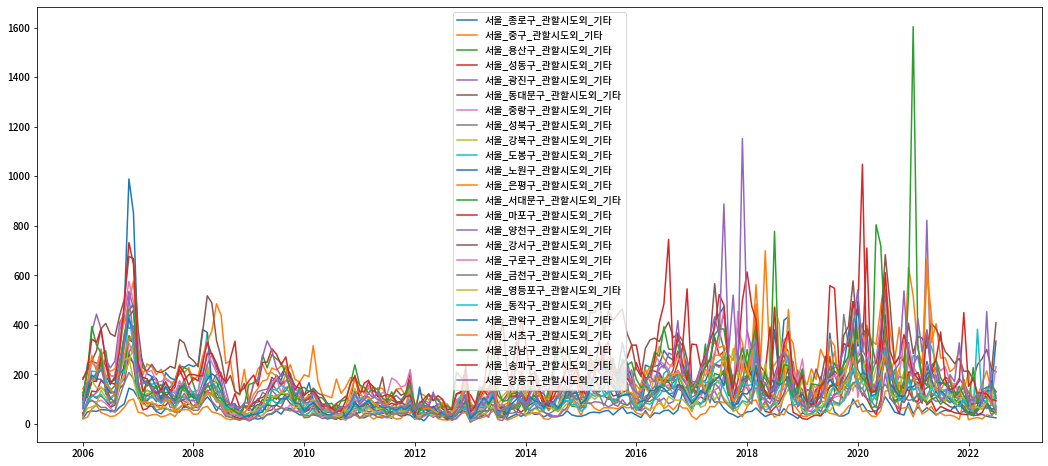

In [14]:
import matplotlib.pyplot as plt

city = '서울'
loc = set(df[df['지역'].str.contains(city)]['지역'])
loc.remove(city)
data = get_data(loc, ['관할시도외_기타'])

plt.figure(figsize=(18,8))
plt.plot(data)
plt.legend(data)
plt.show()

In [28]:
cities = list(dict.fromkeys(list(filter(lambda x: '_' not in x, df['지역']))))
cities.remove('전국')
cities.remove('(구)제주')

In [80]:
list(data)

['서울_관할시도외_서울',
 '부산_관할시도외_서울',
 '대구_관할시도외_서울',
 '인천_관할시도외_서울',
 '광주_관할시도외_서울',
 '대전_관할시도외_서울',
 '울산_관할시도외_서울',
 '세종_관할시도외_서울',
 '경기_관할시도외_서울',
 '강원_관할시도외_서울',
 '충북_관할시도외_서울',
 '충남_관할시도외_서울',
 '전북_관할시도외_서울',
 '전남_관할시도외_서울',
 '경북_관할시도외_서울',
 '경남_관할시도외_서울',
 '제주_관할시도외_서울']

In [85]:
data['제주_관할시도외_서울']

9
2006-01-01      0.0
2006-02-01      0.0
2006-03-01      0.0
2006-04-01      0.0
2006-05-01      0.0
              ...  
2022-03-01     95.0
2022-04-01     95.0
2022-05-01    172.0
2022-06-01    124.0
2022-07-01     78.0
Name: 제주_관할시도외_서울, Length: 199, dtype: float64

In [88]:
data.columns

Index(['서울_관할시도외_서울', '부산_관할시도외_서울', '대구_관할시도외_서울', '인천_관할시도외_서울',
       '광주_관할시도외_서울', '대전_관할시도외_서울', '울산_관할시도외_서울', '세종_관할시도외_서울',
       '경기_관할시도외_서울', '강원_관할시도외_서울', '충북_관할시도외_서울', '충남_관할시도외_서울',
       '전북_관할시도외_서울', '전남_관할시도외_서울', '경북_관할시도외_서울', '경남_관할시도외_서울',
       '제주_관할시도외_서울'],
      dtype='object')

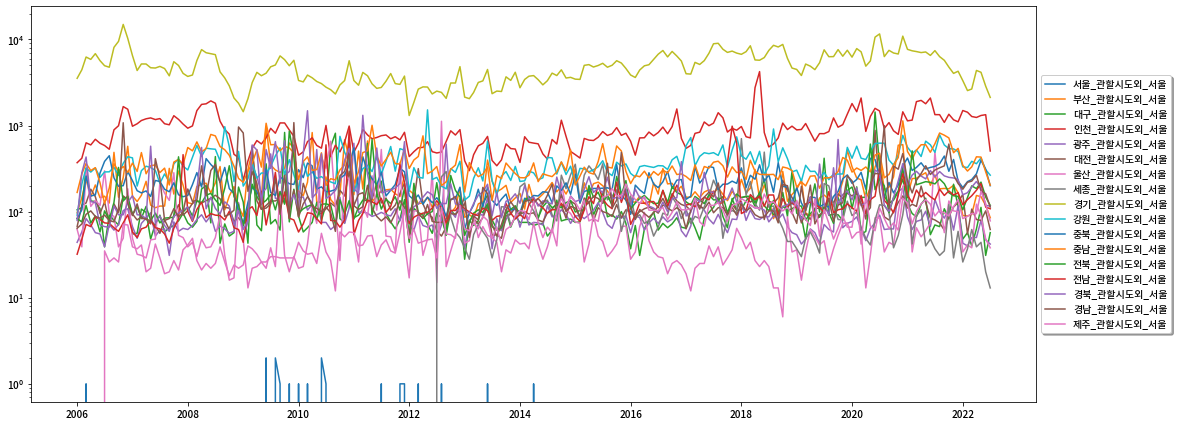

In [90]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18,16))
ax = fig.add_subplot(2, 1, 1)
ax.plot(data)
ax.legend(data, loc='center left',  bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True)

ax.set_yscale('log')

plt.show()

In [53]:
rank = pd.DataFrame({data.iloc[-1-x].name : data.iloc[-1]/data.iloc[-1-x].sort_values() for x in [1,3,6,12,24]})
rank

,2022-06-01,2022-04-01,2022-01-01,2021-07-01,2020-07-01
강원_관할시도외_서울,0.863192,0.736111,0.800604,0.543033,0.424679
경기_관할시도외_서울,0.739358,0.485675,0.637869,0.286004,0.182893
경남_관할시도외_서울,0.701863,0.428030,0.620879,0.371711,0.412409
경북_관할시도외_서울,0.983051,0.517857,0.738854,0.458498,0.412811
광주_관할시도외_서울,0.893617,0.840000,0.976744,0.304348,0.461538
대구_관할시도외_서울,1.838710,0.904762,1.187500,0.814286,0.171171
대전_관할시도외_서울,0.607843,0.765432,0.389937,0.775000,0.362573
부산_관할시도외_서울,0.720339,0.551948,0.944444,0.318352,0.191874
서울_관할시도외_서울,NaN,NaN,NaN,NaN,NaN
세종_관할시도외_서울,0.650000,0.333333,0.500000,0.351351,0.108333


In [64]:
rank.iloc[:, 0].sort_values()

인천_관할시도외_서울    0.378743
대전_관할시도외_서울    0.607843
제주_관할시도외_서울    0.629032
충북_관할시도외_서울    0.643087
세종_관할시도외_서울    0.650000
충남_관할시도외_서울    0.700000
경남_관할시도외_서울    0.701863
부산_관할시도외_서울    0.720339
경기_관할시도외_서울    0.739358
울산_관할시도외_서울    0.791667
전북_관할시도외_서울    0.797297
강원_관할시도외_서울    0.863192
광주_관할시도외_서울    0.893617
전남_관할시도외_서울    0.955752
경북_관할시도외_서울    0.983051
대구_관할시도외_서울    1.838710
서울_관할시도외_서울         NaN
Name: 2022-06-01 00:00:00, dtype: float64

- 거래량 총합 많은 순만 뽑아오기
- 저거 레전드 위치 좀 맵플롯도 깔끔하게
- 연도별 합
- 서브 df 뽑아오는거 좀 더 이쁜 함수로 만들기

In [ ]:
import json

In [ ]:
api_key = 'ODc0ZDE0YjdmODBlMWE2ODBkYThlYWY4NzdhMjljYTU='
url = 'https://kosis.kr/openapi/statisticsList.do?method=getList&apiKey=' + api_key + '&vwCd=MT_ZTITLE&parentListId=I1_2&format=json&jsonVD=Y'

In [ ]:
response = requests.get(url)
response

<Response [200]>

In [ ]:
json = response.json()
json

[{'TBL_NM': '규모별 미분양현황',
  'TBL_ID': 'DT_MLTM_2080',
  'VW_CD': 'MT_ZTITLE',
  'VW_NM': '국내통계 주제별',
  'ORG_ID': '116',
  'REC_TBL_SE': 'N'},
 {'TBL_NM': '공사완료후 미분양현황',
  'TBL_ID': 'DT_MLTM_5328',
  'VW_CD': 'MT_ZTITLE',
  'VW_NM': '국내통계 주제별',
  'ORG_ID': '116',
  'REC_TBL_SE': 'N'},
 {'TBL_NM': '시・군・구별 미분양현황',
  'TBL_ID': 'DT_MLTM_2082',
  'VW_CD': 'MT_ZTITLE',
  'VW_NM': '국내통계 주제별',
  'ORG_ID': '116',
  'REC_TBL_SE': 'N'},
 {'TBL_NM': '미분양현황_종합',
  'TBL_ID': 'DT_MLTM_2086',
  'VW_CD': 'MT_ZTITLE',
  'VW_NM': '국내통계 주제별',
  'ORG_ID': '116',
  'REC_TBL_SE': 'N'}]

In [ ]:
api_key = 'ODc0ZDE0YjdmODBlMWE2ODBkYThlYWY4NzdhMjljYTU='

seq = 'Q'
start_date = 

In [ ]:
'https://kosis.kr/openapi/statisticsBigData.do?method=getList' + '&apiKey=' + api_key + '&userStatsId=' + stat_id + '&prdSe=' + seq + '&startPrdDe=' + start_date + '&format=xls'